## Oriented FAST and Rotated BRIEF (ORB)
***

ORB, assim como o BRISK, é uma extensão do detector de ponto-chave FAST. Ele, também, utiliza uma pirâmide de imagens para dar conta de pontos-chave de escala múltipla. No entanto, (e ao contrário do BRISK), a ORB adiciona invariância de rotação também.

O detector de ponto-chave ORB, introduzido por Rublee et al. Em seu artigo de 2011, ORB: Uma alternativa eficiente para o SIFT ou SURF, consiste em três etapas principais.

O primeiro passo é calcular o detector de ponto-chave FAST em várias escalas da imagem, como no detector de ponto-chave BRISK. É utilizada uma vizinhança circular de 16 pixels, onde 9 pixels contíguos devem ser todos menores ou maiores que o pixel central. Se este caso contíguo for mantido, o pixel central é marcado como um ponto-chave.

Então, um segundo passo é introduzido para classificar os pontos-chave. Todos os pontos-chave reunidos em todas as escalas da pirâmide de imagens são classificados de acordo com o ponto crítico de Harris. Um máximo de n = 500 pontos-chave é mantido, e o resto é descartado.

Finalmente, a invariância de rotação é adicionada na terceira etapa do ORB. Aqui, é examinada a região em torno do centro do ponto chave - este processo de medição da orientação do ponto-chave é chamado de centro de intensidade

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Carrega a imagem e converte para Grayscale
input_image = cv2.imread('imagens/plataforma.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [3]:
# Cria o detector ORB
orb = cv2.ORB_create()

In [4]:
# Encontra os keypoints
keypoints = orb.detect(gray_image, None)

In [5]:
# Calcula keypoints e descritores
keypoints, descriptors = orb.compute(gray_image, keypoints)

In [6]:
# Desenha os keypoints na imagem (da error!)
final_keypoints = cv2.drawKeypoints(input_image, keypoints, gray_image, color=(0,255,0), flags=0)

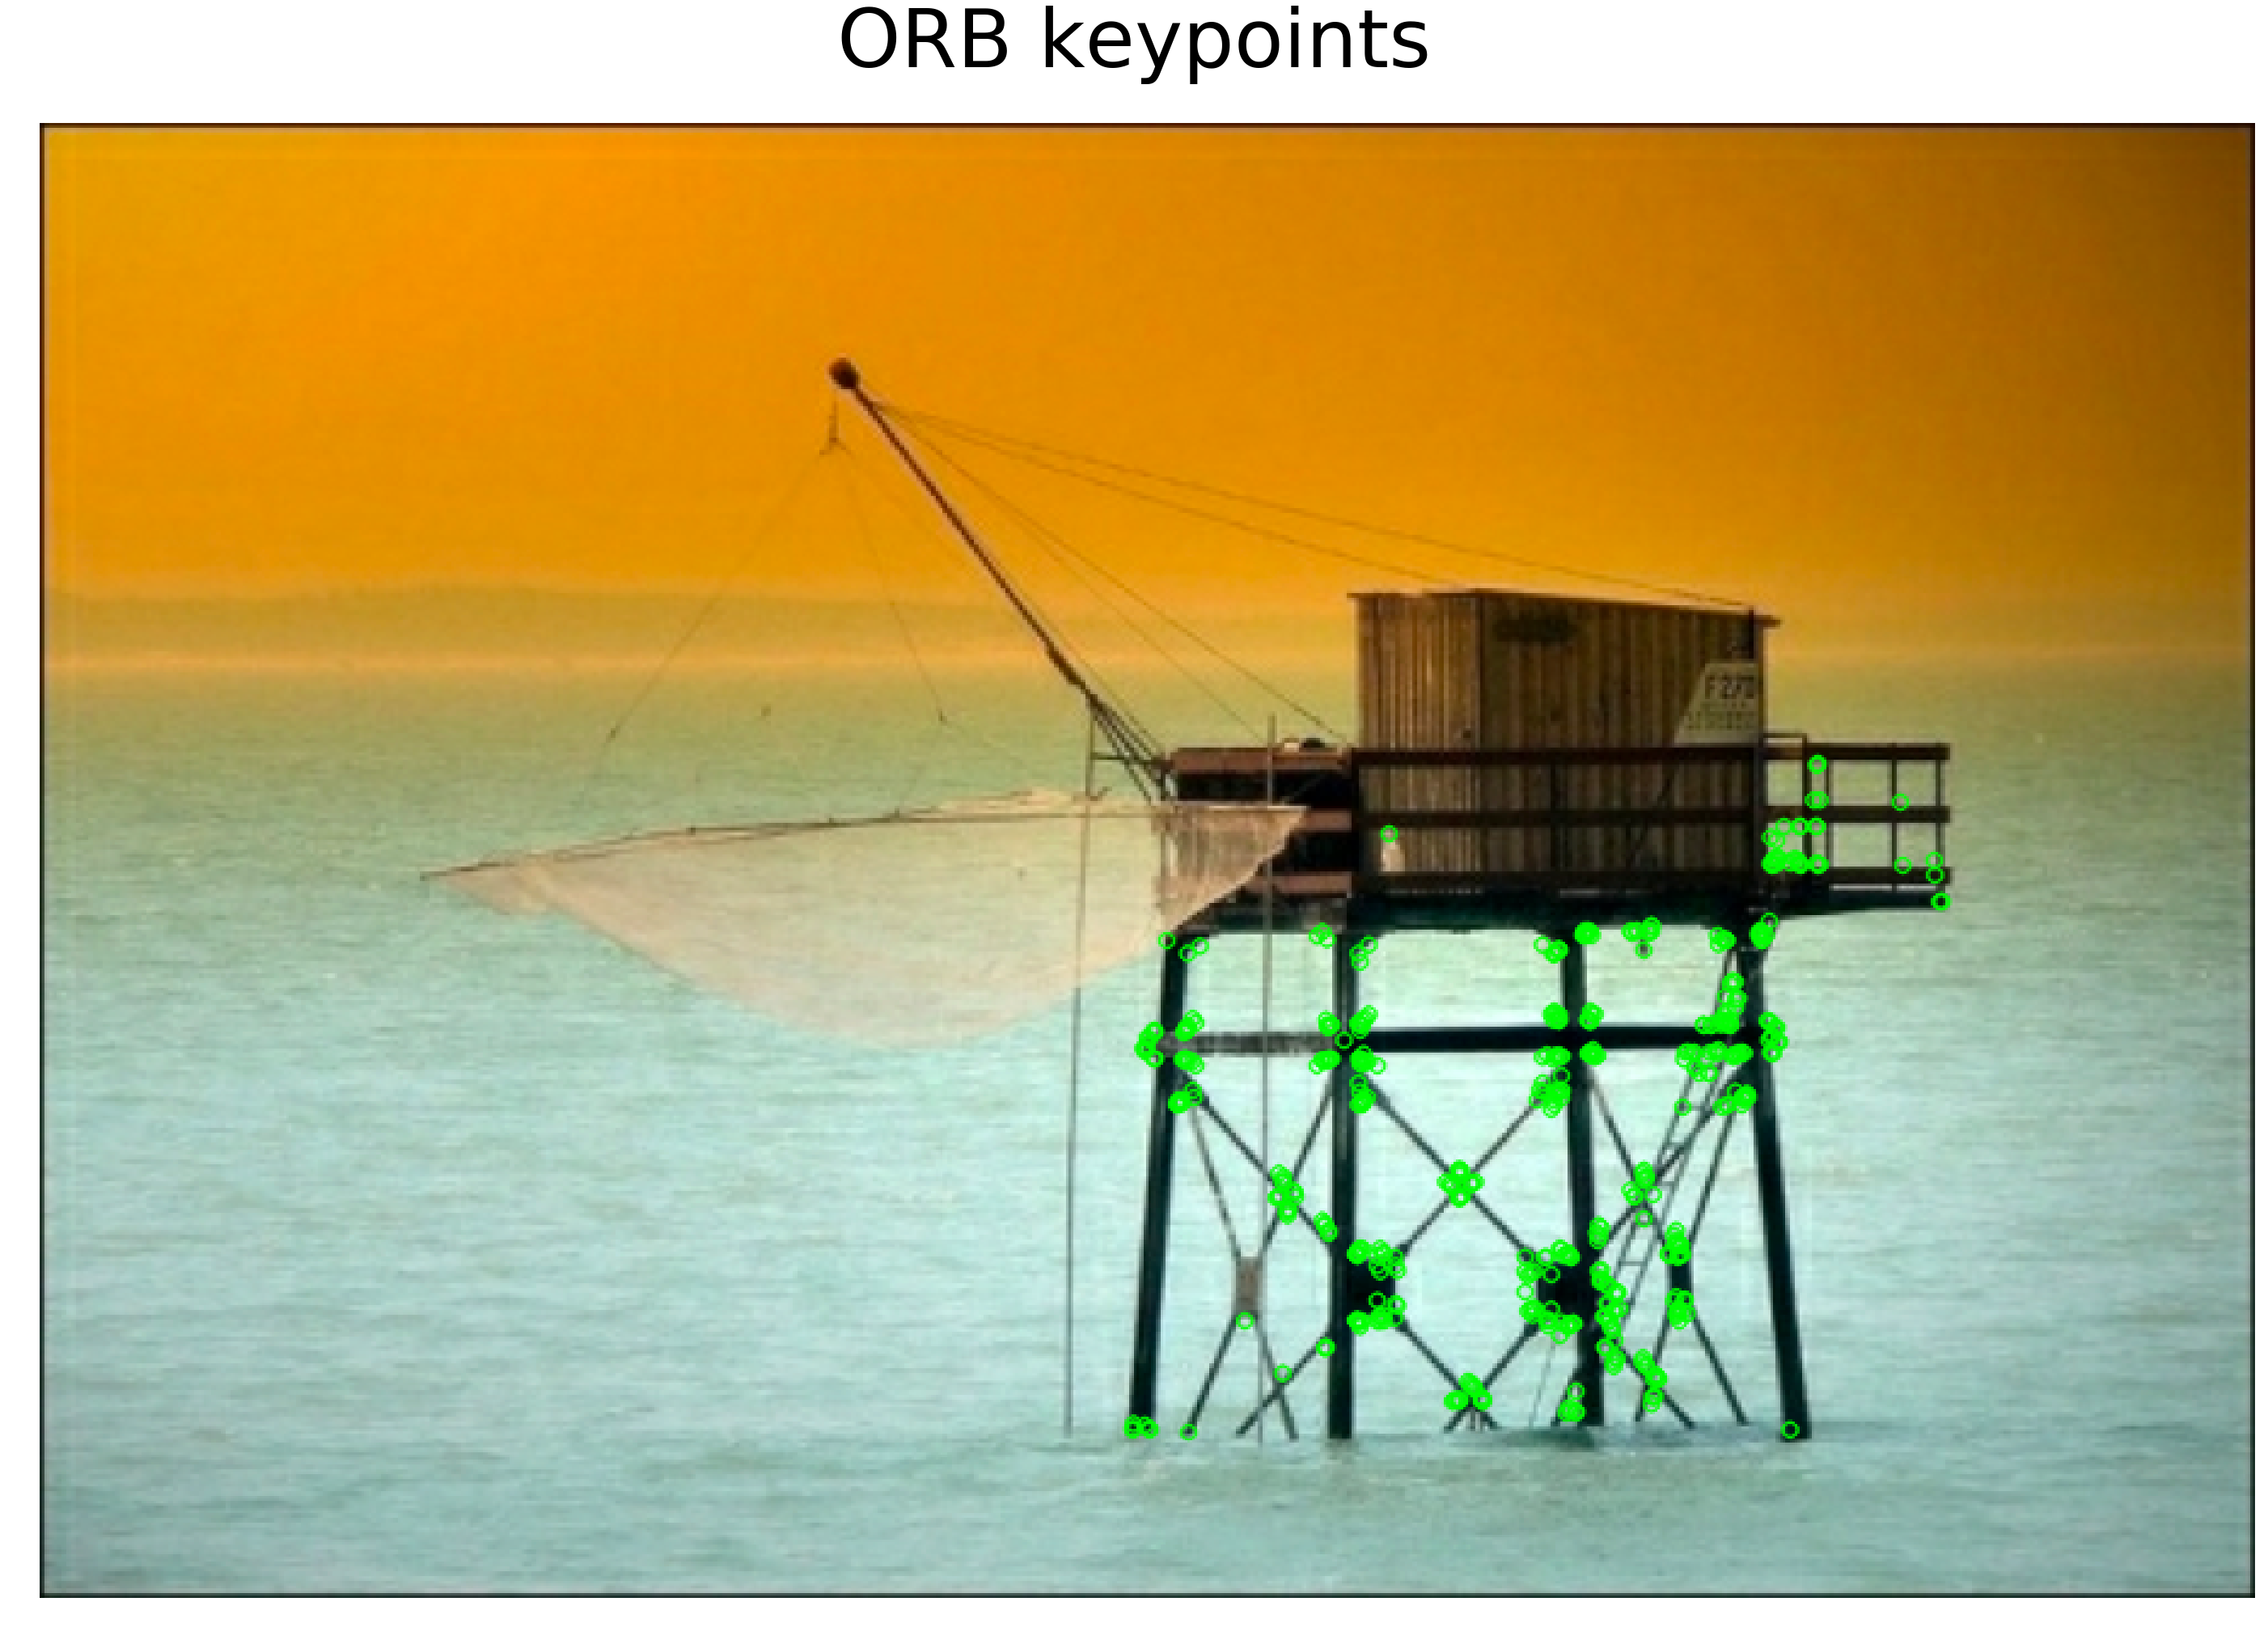

In [7]:
show(final_keypoints, 'ORB keypoints')